For this assignment we will predict garment workers' productivity with KNN Regression and Ordinary Least Square (OLS)
Regression models. 

The data source is here: https://www.kaggle.com/datasets/ishadss/productivity-prediction-of-garment-employees
        



About the Dataset

Context
The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. 
Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. 
So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories

Content
This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.

Acknowledgements
Relevant Papers:

[1] Imran, A. A., Amin, M. N., Islam Rifat, M. R., & Mehreen, S. (2019). Deep Neural Network Approach for Predicting the Productivity of Garment Employees. 2019 6th International Conference on Control, 
Decision and Information Technologies (CoDIT). [Web Link]

[2] Rahim, M. S., Imran, A. A., & Ahmed, T. (2021). Mining the Productivity Data of Garment Industry. International Journal of Business Intelligence and Data Mining, 1(1), 1. [Web Link]

Inspiration
This dataset can be used for regression purpose by predicting the productivity range (0-1) or for classification purpose by transforming the productivity range (0-1) into different classes.

In [2]:

# Import packages

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler


In [3]:
# Data source URL path 

path = "C:\Portfolio\Data Engineer Track\Thinkful\Similarity Models Challenge - Garment Productivity\garments_worker_productivity.csv"

In [18]:
# Dataframe variable

df = pd.read_csv(path)

df = df.drop(df.loc[:, "date":"team"].columns, axis = 1)

In [24]:

# Scale data

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.values.reshape(-1,1))



In [ ]:
# replace sweing in department to sewing

In [19]:
df.isnull().sum()

targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [40]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors = 10)

knn = neighbors.KNeighborsRegressor(n_neighbors = 10, weights = "distance")

X = pd.DataFrame(df.no_of_workers)
Y = df.actual_productivity
knn_w.fit(X, Y)

KNeighborsRegressor(n_neighbors=10)

C:\Users\rakim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


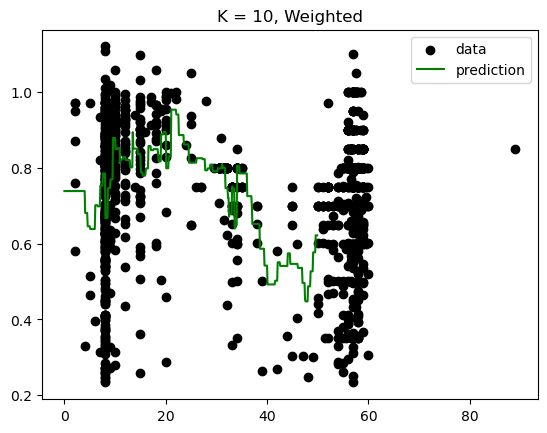

In [35]:

# Set up the prediction line

T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c = "k", label = "data")
plt.plot(T, Y_, c = "g", label = "prediction")
plt.legend()
plt.title("K = 10, Weighted")
plt.show()

In [41]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.09)
Weighted Accuracy: -0.15 (+/- 0.08)


In [37]:
# Ordinary Least Squared Regression (OLS)



In [43]:
# Import packages 

from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

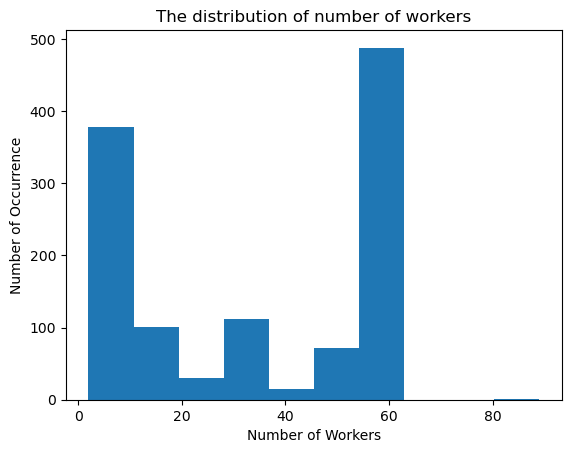

In [45]:
# Plot histogram of no_of_workers

plt.hist(df.no_of_workers)
plt.title("The distribution of number of workers")
plt.xlabel("Number of Workers")
plt.ylabel("Number of Occurrence")
plt.show()

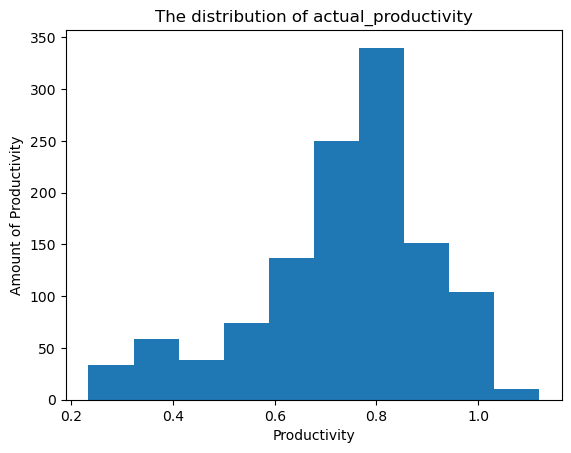

In [47]:
# Plot histogram of actual_productivity

plt.hist(df.actual_productivity)
plt.title("The distribution of actual_productivity")
plt.xlabel("Productivity")
plt.ylabel("Amount of Productivity")
plt.show()

In [48]:
# Create a linear regression model object

lrm = linear_model.LinearRegression()

In [49]:
# Fit method estimates the coefficients using OLS 

lrm.fit(X,Y)

# Inspect the results

print("\nCoefficients: \n", lrm.coef_)
print("\nIntercept: \n", lrm.intercept_)


Coefficients: 
 [-0.00045584]

Intercept: 
 0.750867753438935


In [ ]:
# Estimated Model

Productivity = -0.00045584*(number of workers) + 0.750867753438935 

Conclusion

The KNN regression model is horrible. The accuracy is in the negatives. The linear
regression model, however, is interesting. As the number of workers increases, productivity increases to a point.
For instance, at 10,000 workers productivity as negative. More is not always better. These results show 
that companies should find the cutoff where the amount of workers does not lead to a productivity gain. 